---
title: "significance (p-value)"
execute:
  # echo: false
  freeze: auto  # re-render only when source changes
format:
  html:
    code-fold: true
    code-summary: "Show the code"
---

Given a correlation coefficient $r$, we can assess its significance using a p-value. Let's formulate the hypotheses:

* **Null Hypothesis ($H_0$)**: There is no correlation between the two variables (i.e., $r = 0$).
* **Alternative Hypothesis ($H_a$)**: There is a correlation between the two variables (i.e., $r \neq 0$).

To calculate the p-value, we can use the following formula for the test statistic $t$:

$$
t = \frac{r \sqrt{n - 2}}{\sqrt{1 - r^2}}
\tag{1}
$$
where $n$ is the number of data points.

This formula follows the fundamental structure of a t-statistic:

$$
t = \frac{\text{Signal}}{\text{Noise}} = \frac{\text{Observed Statistic} - \text{Null Value}}{\text{Standard Error of the Statistic}}
\tag{2}
$$

Let's rearrange Eq. (1) to match the structure of Eq. (2):

$$
t = \frac{r - 0}{\sqrt{\frac{1 - r^2}{n - 2}}}
\tag{3}
$$

The numerator is clear enough. Let's discuss the denominator, which represents the standard error of the correlation coefficient.

The term $1 - r^2$ is the proportion of **unexplained variance** in the data. As the correlation $r$ gets stronger (closer to 1 or -1), the unexplained variance gets smaller. This makes intuitive sense: a very strong correlation is less likely to be a result of random chance, so the standard error (noise) should be smaller.

The term $n−2$ is the degrees of freedom. As your sample size n increases, the denominator gets larger, which makes the overall standard error smaller. This also makes sense: a correlation found in a large sample is more reliable and less likely to be a fluke than the same correlation found in a small sample.

Let's try a concrete example.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [75]:
#| code-summary: "generate x and y data with some noise"

# set seed for reproducibility
np.random.seed(1)
N = 100
x = np.linspace(0, 10, N)
y = 0.2 * x + 7*np.random.normal(size=x.size)

In [80]:
#| code-summary: "calculate a bunch of stuff"

# compute sample z-scores of x, y
zx = (x - np.mean(x)) / np.std(x, ddof=0)
zy = (y - np.mean(y)) / np.std(y, ddof=0)

# compute Pearson correlation coefficient
rho = np.sum(zx * zy) / N
# compute t-statistic
t = rho * np.sqrt((N-2) / (1-rho**2))
# compute two-sided p-value
p = 2 * (1 - stats.t.cdf(np.abs(t), df=N-2))

our p-value:   0.0458
scipy p-value: 0.0458


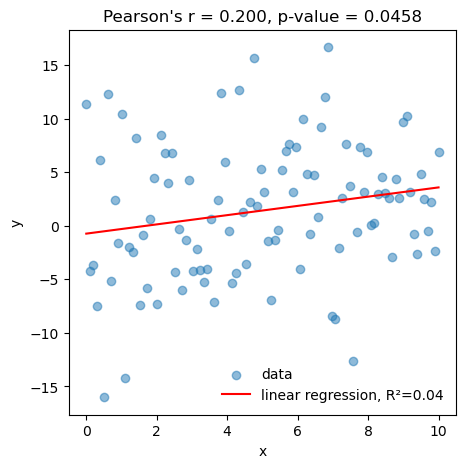

In [86]:
#| code-summary: "plot"
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(x, y, label='data', alpha=0.5)

# linear fit and R2 with scipy
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax.plot(x, slope*x + intercept, color='red', label=f'linear regression, R²={r_value**2:.2f}')
ax.legend(frameon=False)

# print p-value
print(f'our p-value:   {p:.4f}')
print(f'scipy p-value: {p_value:.4f}')

# compute correlation coefficients and their p-values
r = np.corrcoef(x, y)[0,1]
ax.set(xlabel='x',
       ylabel='y',
       title=f"Pearson's r = {rho:.3f}, p-value = {p_value:.4f}");

The linear regression accounts for 4% of the variance in the data, which corresponds to a correlation coefficient of $r = 0.2$. This correlation is statistically significant at $p=0.0458<0.05$.